# Problem 1

This problem concerns the 'bulbs' in the Mandelbrot set $M$ and is our first real result about the structure of $M$. 

1. Problem 1 is a continuation of problem 2 from `2-27Poblems` so make sure that you are familiar with the solution presented there. As an exercise, use the code in that file and `julia_plot(interact = True)` to find a value $c$ so that the corresponding filled Julia set seems like it would have an attracting periodic orbit of period $n$ for some (smallish) $n$ that you choose. Plot the iterates of $0$ and see that they tend to your guess for the attracting periodic orbit. 
2. You will hopefully have noticed by now that all of the points in the same "bulb" of the Mandelbrot set have the same attracting periodic orbit structure. This problem is to discover a method to find a distinguished value $c$ in each bulb of the Mandelbrot set. First recall that if for a value $c$, there exists an attracting periodic orbit then the iterates 
$$0 \mapsto f_c(0) \mapsto \cdots \mapsto f_c^n(0) \mapsto \cdots $$
get close to that orbit, and vice versa, if these iterates tend to a periodic orbit then that is an attracting orbit. One way to find $c$ such that the iterates tend to a periodic orbit is *if 0 already lies in a periodic orbit*. 
    a. Consider the equation 
    $$f_c^{n}(0) = 0$$
    expand this equation out for small values of $n$, explicitly plugging in $f_c(z) = z^2 + c$. 
    
    b. Use this to find, for small values of $n$ (say, $n \in \{1, 2, 3,4, 5, 6\}$ or fewer if it is running slowly) all values of $c$ such that $0$ lies on an attracting periodic orbit. 
    
    c. Plot these together with the mandelbrot set (maybe copying `plot_with_mandelbrot` from `2-27Problems`) and notice they do actually lie in these bulbs. 
    
These points are called the **centers** of the bulbs. We can now actually state an unsolved problem in mathematics (and a pretty important one in this field)

> **Density of Hyperbolicity** Does every point $c$ in $M$ which is in the interior of $M$ (i.e. $c$ is colored black and all nearby $c'$ are also colored black) lie in one of the bulbs? 

This is called the density of hyperbolicity conjecture because these bulbs are technically called *hyperbolic components*. Mathematicians are pretty confident that this is true and have some ideas of how to prove this but it's still unknown!

---
# Problem 2 

This problem concerns the question as to why the Julia set is a fractal. Specifically, we intend to demonstrate that the Julia set is *self-similar*. To be pedantic, it is actually not precisely self-similar but *quasi-self-similar* meaning that at different length-scales there are slight variations in structure. In my opinion this is cooler!

We will use what we know about holomorphic maps, and in particular the fact that they are conformal where their derivative doesn't vanish. 

We'll use the code from the demo 

    def mapped_circle(center, radius, f, num_circles = 5, num_splines = 10, color = 'orange', thickness = .4, fillalpha= .1):
        center_coords = (CDF(center).real(), CDF(center).imag())
        radii = [radius/num_circles * k for k in range(1, num_circles + 1)]
        angles = [pi *θ / (num_splines) for θ in range(num_splines)]
        coords_f = lambda x,y : ((z := f(x + I*y)).real(), z.imag())
        t = var('t')
        spline = lambda θ : parametric_plot(coords_f(cos(θ)*t + center_coords[0] , sin(θ)*t + center_coords[1]), (t , -radius, radius), color = color, thickness = thickness)
        circ = lambda r : parametric_plot(coords_f(r*cos(t) + center_coords[0], r*sin(t) + center_coords[1]), (t,0,2*pi), color = color, fill = True, fillcolor = color, fillalpha = 0.1, thickness = thickness)
        return sum(spline(θ) for θ in angles) + sum(circ(r) for r in radii )

which allows one to plot circles in the complex plane, and their images under holomorphic maps, in particular under the maps $f_c : z \mapsto z^2 + c$. 

Here are the steps to see that a Julia set should be self similar:

1. Pick some value of $c$. It should work with any but maybe it's more clear if $c\in M$. The value $c = -1.14 + .25i$ is as good an example as any. 
2. Create a graphics object of a circle using the code provided. For the starting circle we want to use the map $z \mapsto z$ and plug this in to `mapped_circle` given in code by 
    
        id(z) = z
        circle1 = mapped_circle((__, __), ____, id) #the first argument is the x and y coordinates of the center of the circle. The second is its radius. 
        
   selecting appropriate values for the x and y coordinates of the center and for the radius. You can also, for example, modify it's color by adding the argument `color = ____`. 
3. Copy or load the `plot_with_julia` function from `2-20Problems` and plot the Julia set for $f_c$ together with this circle

        plot_with_julia(circle1, id, pixel_count = 1000)
    
   it would be best (for later) to modify the circle so that the radius is not too large or small (0.4 is a good choice) and that it lies over the boundary of the filled Julia set, and contains some points pretty far away from the Julia set. 
   
4. Create circle that come from mapping this circle under $f_c$, and plot them together with `circle1` and the Julia set

        f(z) = z^2 + c
        circle2 = mapped_circle((__, __), ____, f) #use the same values
        plot_with_julia(circle1 + circle2, f, pixel_count = 1000)
       
   This shows the plot of the circle $C$ you started with, together with $f_c(C)$. This should already give you an indication of why the Julia set is quasi-self-similar. 
   Can you choose a function to insert into `circle3 = mapped_circle(______)` to plot the image of $f_c(C)$ under $f_c$? I.e. $f_c^2(C)$? What about $f_c^3(C)$? Plot all of these together. 
5. Using this picture as a guide, can you prove using the properties of holomorphic maps, that the Julia set is quasi-self-similar? 

In [2]:
def mapped_circle(center, radius, f, num_circles = 5, num_splines = 10, color = 'orange', thickness = .4, fillalpha= .1):
    center_coords = (CDF(center).real(), CDF(center).imag())
    radii = [radius/num_circles * k for k in range(1, num_circles + 1)]
    angles = [pi *θ / (num_splines) for θ in range(num_splines)]
    coords_f = lambda x,y : ((z := f(x + I*y)).real(), z.imag())
    t = var('t')
    spline = lambda θ : parametric_plot(coords_f(cos(θ)*t + center_coords[0] , sin(θ)*t + center_coords[1]), (t , -radius, radius), color = color, thickness = thickness)
    circ = lambda r : parametric_plot(coords_f(r*cos(t) + center_coords[0], r*sin(t) + center_coords[1]), (t,0,2*pi), color = color, fill = True, fillcolor = color, fillalpha = 0.1, thickness = thickness)
    return sum(spline(θ) for θ in angles) + sum(circ(r) for r in radii )

from PIL import Image as pilimg

def plot_with_julia(graphics, f, **kwds):
    kwdscopy = dict(kwds)
    x_center = kwds.pop("x_center", 0.0)
    y_center = kwds.pop("y_center", 0.0)
    image_width = kwds.pop("image_width", 4.0)
    pixel_count = kwds.pop("pixel_count", 500)
    xmax = x_center + image_width*0.5
    xmin = x_center - image_width*0.5
    ymax = y_center + image_width*0.5
    ymin = y_center - image_width*0.5
    graphics.save("./tmp/g.png", transparent = True, axes=False, xmin=xmin, xmax = xmax, ymin = ymin, ymax = ymax, aspect_ratio = 1, figsize = [10,10])
    julia = julia_plot(f, mandelbrot = False, **kwdscopy)
    julia_modified = julia.pil.convert('RGBA')
    mod = pilimg.open('./tmp/g.png')
    mod_resized = mod.resize((julia.height(), julia.width()))
    julia_modified.alpha_composite(mod_resized)
    return julia_modified

## A solution

We will just plot the final picture and then give some sort of explanation for why we get a self-similar structure. 

<ipython-input-2-39b3f4a848c7>:7: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  spline = lambda θ : parametric_plot(coords_f(cos(θ)*t + center_coords[Integer(0)] , sin(θ)*t + center_coords[Integer(1)]), (t , -radius, radius), color = color, thickness = thickness)


<ipython-input-2-39b3f4a848c7>:8: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  circ = lambda r : parametric_plot(coords_f(r*cos(t) + center_coords[Integer(0)], r*sin(t) + center_coords[Integer(1)]), (t,Integer(0),Integer(2)*pi), color = color, fill = True, fillcolor = color, fillalpha = RealNumber('0.1'), thickness = thickness)


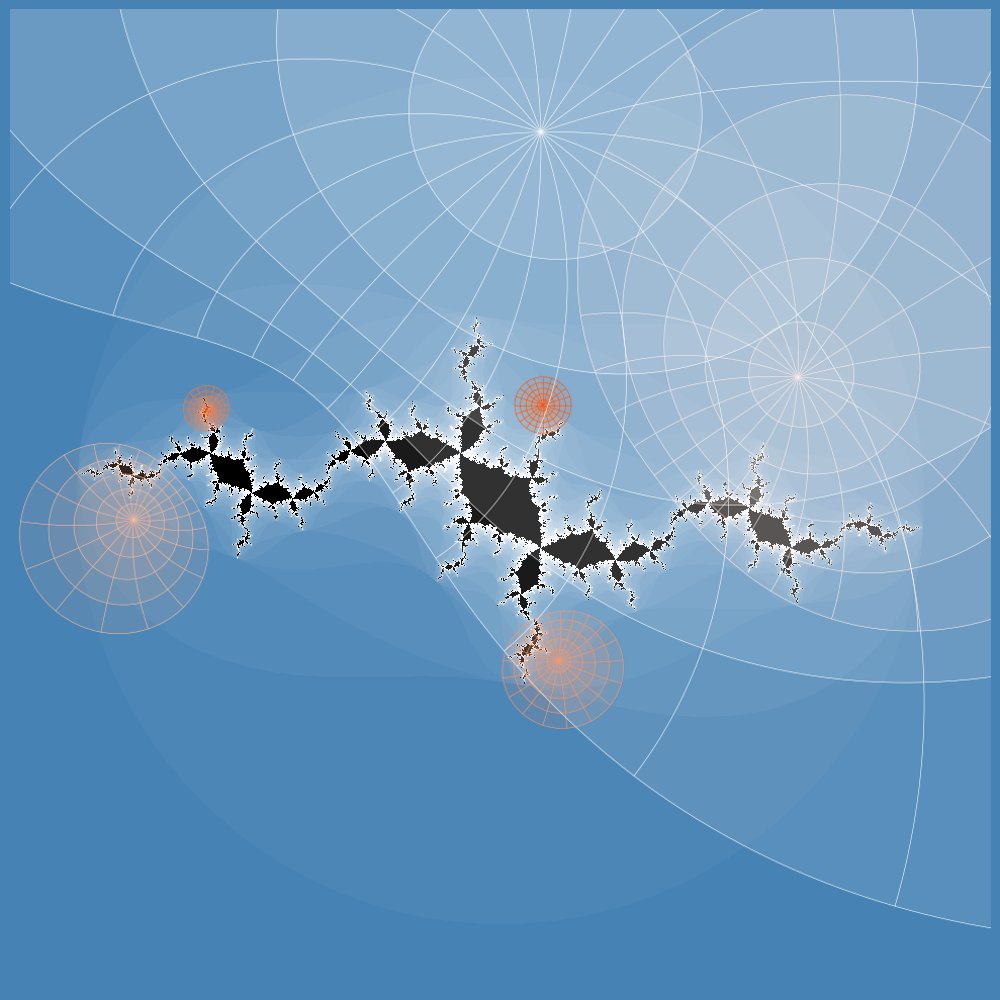

In [12]:
c = -1.15 + .25*I
id(z) = z
f(z) = z^2 + c
circle1 = mapped_circle((0.18,0.4), .12, id, color = '#fc5203')
circle2 = mapped_circle((0.18,0.35), .12, f, color = '#ff7738')
circle3 = mapped_circle((0.18,0.35), .12, f(f(z)), color = '#ff9869')
circle4 = mapped_circle((0.18,0.35), .12, f(f(f(z))), color = '#ffbb9c')
circle5 = mapped_circle((0.18,0.35), .12, f(f(f(f(z)))), color = '#ffefe8')
circle6 = mapped_circle((0.18,0.35), .12, f(f(f(f(f(z))))), color = '#ffffff')
#plot_with_julia(circle1, f, pixel_count = 1000)
plot_with_julia(circle1 + circle2 + circle3 + circle4 + circle5 + circle6, f, pixel_count = 1000)

First a few comments about the plot: we have plotted a circle $C_1$ in a red-ish color, and its iterated images $f_c(C_1), f_c(f_c(C_1)), \ldots$ under $f_c = z^2 + c$, with each successive iterate in a lighter color. 

Now let's make a few observations. First, we have avoided the critical points of $f_c$ (which only occur at $z = 0$). This means that, for example, $C_1$ and $C_2 = f_c(C_1)$ are conformally equivalent to each other under $f_c$, and so on. Second, notice that since $C_1$ contains many blue points, which escape to $\infty$ as we continue to iterate $f_c$, eventually the iterated images $f_c^n(C_1)$ get very very large. Larger than our picture. Third, notice that if $x \in C_1$ also lies inside the filled Julia set, i.e. is colored black, then $f_c(x)$ is colored black as well since of course $f_c(x)$ remains bounded if $x$ does. This means that black points in $C_1$ are sent to black points in $C_2$, and so on. But this means that a small piece of the filled Julia set (i.e. the part intersecting $C_1$) looks very much like a larger piece of it (say, the part intersecting $C_6$. ) This fact, together with the fact that Julia sets can be complicated at some points, demonstrate that Julia sets can be fractals. 